In [1]:
# imorts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Analiza zbioru danych New York Times

## 1.-3.

In [2]:
# load data
nyt_df = pd.read_csv("./data/nyt-frame.csv", header = 0)
nyt_data = nyt_df.iloc[:,9:].values

In [3]:
# 20 random words
nyt_words = list(nyt_df.columns.values[9:])
sample_word = np.random.choice(nyt_words, 20, replace=False)
print(sample_word)

['truly' 'randall' 'views' 'dress' 'determined' 'slash' 'meant' 'shirt'
 'granite' 'common' 'lab' 'require' 'matters' 'sense' 'longtime'
 'unfortunate' 'parents' 'carousel' 'concluded' 'flemish']


In [4]:
# pca
nyt_pca = PCA()
nyt_decomposed = nyt_pca.fit_transform(nyt_data)

## 4.-6.

In [5]:
def order_by_component(words, component):
    return sorted(list(zip(words, component)), key=lambda pair: pair[1])


_ordered_by_1st_component = order_by_component(nyt_words, nyt_pca.components_[0])
_ordered_by_2nd_component = order_by_component(nyt_words, nyt_pca.components_[1])

pd.DataFrame({
    "top 15 words (1st component)": _ordered_by_1st_component[-15:],
    "bottom 15 words (1st component)": _ordered_by_1st_component[:15],
    "top 15 words (2nd component)": _ordered_by_2nd_component[-15:],
    "bottom 15 words (2nd component)": _ordered_by_2nd_component[:15],
})

,top 15 words (1st component),bottom 15 words (1st component),top 15 words (2nd component),bottom 15 words (2nd component)
0,"(me, 0.06379278250161456)","(music, -0.11211617341838458)","(vocal, 0.06758794058200349)","(art, -0.15431673143840374)"
1,"(he, 0.06531001248089253)","(trio, -0.08780731643381677)","(orchestra, 0.06760285785600774)","(museum, -0.12089946277617651)"
2,"(mrs, 0.06562096808145736)","(theater, -0.07404600988801463)","(songs, 0.06923167953630344)","(images, -0.09522680440744581)"
3,"(im, 0.06857385461154208)","(orchestra, -0.06926899826753352)","(musical, 0.07070817873039463)","(artists, -0.09263497758879516)"
4,"(paintings, 0.06988483529500222)","(composers, -0.05859060967058658)","(music, 0.07234461523901517)","(donations, -0.0776578027798036)"
5,"(process, 0.07119630147343926)","(opera, -0.05555364096730151)","(festival, 0.0730094079169942)","(museums, -0.07539497668344285)"
6,"(painting, 0.08788709841748964)","(theaters, -0.05117796156989055)","(production, 0.07415772534187778)","(painting, -0.07401963974238192)"
7,"(my, 0.0943252121195821)","(m, -0.04902545227080607)","(sang, 0.07465343667556096)","(tax, -0.07226860058901596)"
8,"(cooper, 0.10300939205022866)","(program, -0.04900138329029389)","(hour, 0.0807586538130772)","(paintings, -0.06564345120814802)"
9,"(mother, 0.10687219119361711)","(players, -0.04881882614499736)","(i, 0.0812015528105673)","(sculpture, -0.06035313871840507)"


Największe wartości pierwszego komponentu wiodącego odpowiadają głównie przyimkom oraz rzeczami związanymi ze sztuką.

Najmniejsze wartości pierwszego komponentu wiodącego odpowiadają głównie rzeczami związanymi z muzyką.

Drugi komponent wiodący widać, że również rodziela słowa na te dotyczące muzyki (największe wartości komponentu) i na słowa dotyczące sztuki (najmniesjze wartości).

## 7.

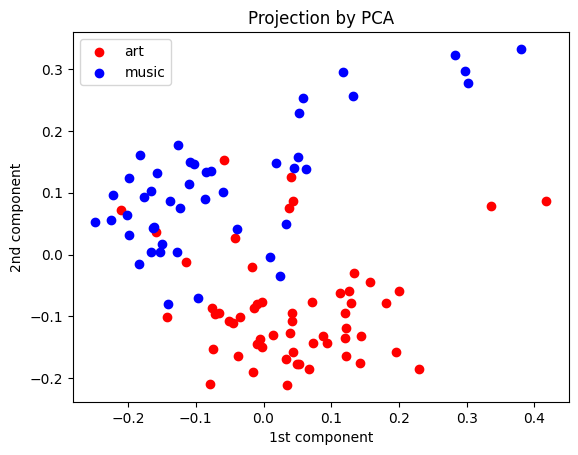

In [6]:
reds = nyt_df["class.labels"] == "art"
blues = nyt_df["class.labels"] == "music"

plt.figure()
plt.scatter(nyt_decomposed[np.array(reds), 0], nyt_decomposed[np.array(reds), 1], c="red")
plt.scatter(nyt_decomposed[np.array(blues), 0], nyt_decomposed[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(["art", "music"])
plt.show()

Otrzymany wykres wizulanie potwierdza wnioski punktów 4-6. Na prawo (większa wartość wektora cech zrzutowanego na pierwszy komponent wiodący) mamy artykuły dotyczące muzyki jak i sztuki, czyli prawdopobnie mają one dużo przyimków i stosunkowo mało wyrzów wskazujących na sztukę lub muzykę. Takich artykułów jest jdnak mało, gdyby je zignorować, to widać, że po prawej stronie jest więcej artykułów dotyczących sztuki, a po lewej, muzyki (jak w punktach 4 i 5). 

Podobnie jest w przypadku drugiego komponentu wiodącego. Wyżej na wykresie (czyli artykuł ma słowa majace duże wartości po zrzutowaniu na drugi komponent) są artykuły dotyczace muzyki, a niżej na wykresie są artykuły dotyczące sztuki (jak w punkcie 6.). 

Poza tym, już wykorzystując dane zrzutowane na dwa pierwsze komponenty wiodące, można wyznaczyć nienajgorszą granicę decyzyjną.

## 8.

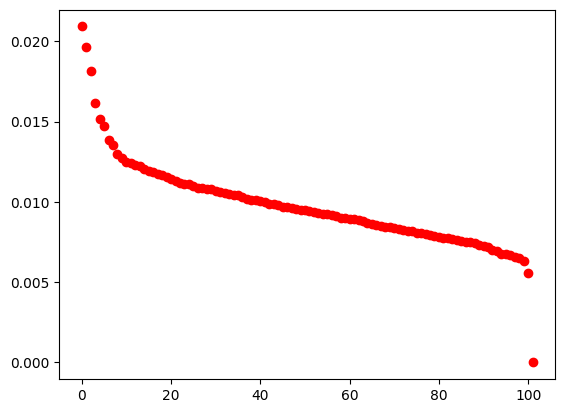

0.15773478029003493


In [7]:
_variance_ratio = nyt_pca.explained_variance_ratio_
plt.plot(_variance_ratio, "ro")
plt.show()
print(sum(_variance_ratio[0:10]))

Zachowane zostaje niecałe 16% wariancji. Po powrotnym rzutowaniu za pomocą pierwszych 10 komponentów, otrzymane dane miałby niecałe 16% wariancji oryginalnych danych.

# Analiza zbioru danych 04Cars

## 1.-2.

In [8]:
# load data
cars_df = pd.read_csv("./data/04cars-data.csv", header=0)
cars_df

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,1,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,1,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,0,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,0,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [9]:
# take last 11 columns
cars_data = cars_df.iloc[:,-11:].values

In [10]:
# scale data
scaled_cars_data = StandardScaler().fit_transform(cars_data)

## 3.

In [11]:
# pca
cars_pca = PCA()
cars_decomposed = cars_pca.fit_transform(scaled_cars_data)

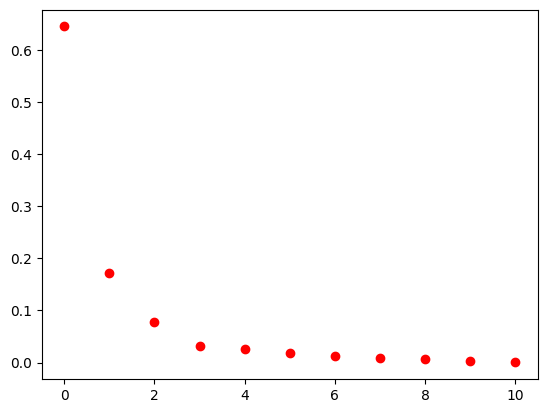

Reduction to 2 dims: 81.71421089701893% of varaince
Reduction to 3 dims: 89.43901348942343% of varaince


In [12]:
_variance_ratio = cars_pca.explained_variance_ratio_

plt.plot(_variance_ratio, "ro")
plt.show()

print(f"Reduction to 2 dims: {sum(_variance_ratio[:2]) * 100}% of varaince")
print(f"Reduction to 3 dims: {sum(_variance_ratio[:3]) * 100}% of varaince")

## 4.

In [13]:
cars_attributes = list(cars_df.columns.values[-11:])

_ordered_by_1st_component = order_by_component(cars_attributes, cars_pca.components_[0])
_ordered_by_2nd_component = order_by_component(cars_attributes, cars_pca.components_[1])

pd.DataFrame({
    "Attributes ordered by 1st component": _ordered_by_1st_component,
    "Attributes ordered by 2nd component": _ordered_by_2nd_component,
})

,Attributes ordered by 1st component,Attributes ordered by 2nd component
0,"(Engine Size (l), -0.347080492025201)","(Wheel Base, -0.4181771069592045)"
1,"(Weight, -0.3363293669404882)","(Len, -0.40841138066875493)"
2,"(Cyl, -0.3341887576286373)","(Width, -0.31289135016250724)"
3,"(HP, -0.31860225848402945)","(Weight, -0.16746357154787056)"
4,"(Width, -0.2960545914170612)","(Engine Size (l), -0.015347186463713414)"
5,"(Wheel Base, -0.2662100335710543)","(Hwy MPG, -0.010964460145348812)"
6,"(Retail Price, -0.2637504434440343)","(City MPG, -0.0033659357616593055)"
7,"(Dealer Cost, -0.262318638753095)","(Cyl, 0.07803201087501876)"
8,"(Len, -0.25679018767068235)","(HP, 0.2922134761391825)"
9,"(Hwy MPG, 0.3065886385804443)","(Retail Price, 0.4685086975025391)"


Największe elementy pierwszego komponentu wiodącego dotyczą spalania na autostradzie i w mieście, a najmniejsze wiążą się z wielkością samochodu i z wielkością oraz mocą silnika. Oznacza to, że ten komponent wiodący rozróżnia auta na z jednej strony małe samochody miejske z małym spalaniem, a zdrugiej strony na duże samochdy, lub z dużymi silnikami, czyli o dużym spalaniu.

Największe elementy drugiego komponentu wiodącego dotyczą ceny samochodów, a także mocy silnika, natomiast najmniejsze dotyczą atrybutów związanych z dużymi samochodami. Można przypuszczać, że ten komponent wiodący rozdziela auta ma sportowe (duża moc), drogie maszyny i na tanie amerykańśkie pick-upy.

Wartości bliskie zeru oznaczają, że atrybut powiązany z nimi nie ma wpływu na to, jak zrzutowane zostaną dane przez k-ty komponent, za to miały wysoki wpływ na rzutowanie przez komponent k-1. Widać to przy drugim komponencie wiodącym - wartości bliskie zeru mają atrybuty dotyczące spalania, wysokie spalanie mają za równo auta sportowe, jak i pick-upy, a samochody o niskim spalaniu nie są tutaj na żadnym z końców tej skali, bo zostały już "wyróżnione" przez pierwszy komponent wiodący. 

## 5.-6.

In [14]:
def pc_plot(score, coeff, names=None, labels=None):
    plt.figure(figsize=(10,10))
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    x = score[:, 0]
    y = score[:, 1]
    x /= (x.max() -x.min())
    y /= (y.max() -y.min())

    plt.scatter(x, y)
    if names:
        for i, name in enumerate(names):
            plt.annotate(name, (x[i], y[i]), size=5)
    
    if labels:
        for i, label in enumerate(labels):
            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="r", alpha=0.3)
            plt.text(coeff[i, 0], coeff[i, 1], label, color="g", ha="center")
            
    plt.show()

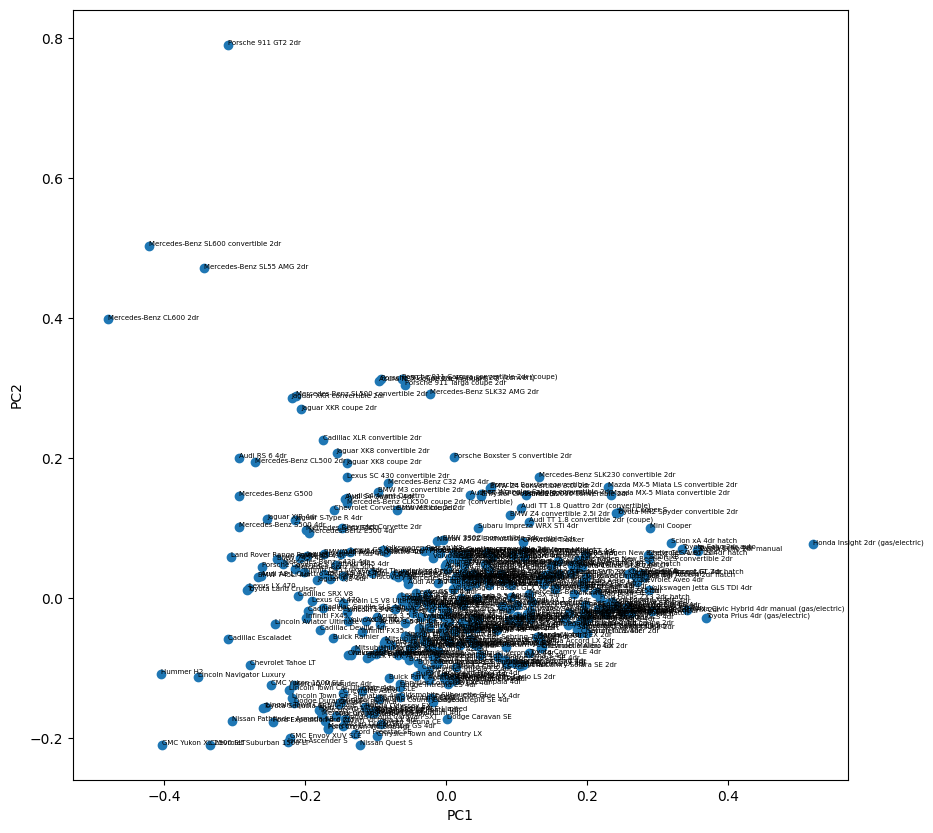

In [15]:
pc_plot(cars_decomposed, cars_pca.components_.T, names=list(cars_df["Vehicle Name"]))

Otrzymany wykres potwierdza wnioski płynące z punktu 4. Pierwszy komponent wiodący rodziela auta ze względu na spalanie (po lewej, małe samochody miejskie, po prawej, samochody z dużym spalaniem: sportowe i pick-upy), a drugi komponent rozdziela samochody ze względu na cenę (na górze, po lewej, samochody sportowe, na dole, po lewej, tanie pick-upy). Ciekawym spostrzeżeniem jest to, że dane ułożyły się w trójkąt, którego dwa kąty przezaczone są na samochody o atrybutach z wysokimi wartościami w którymś z komponetów wiodących.

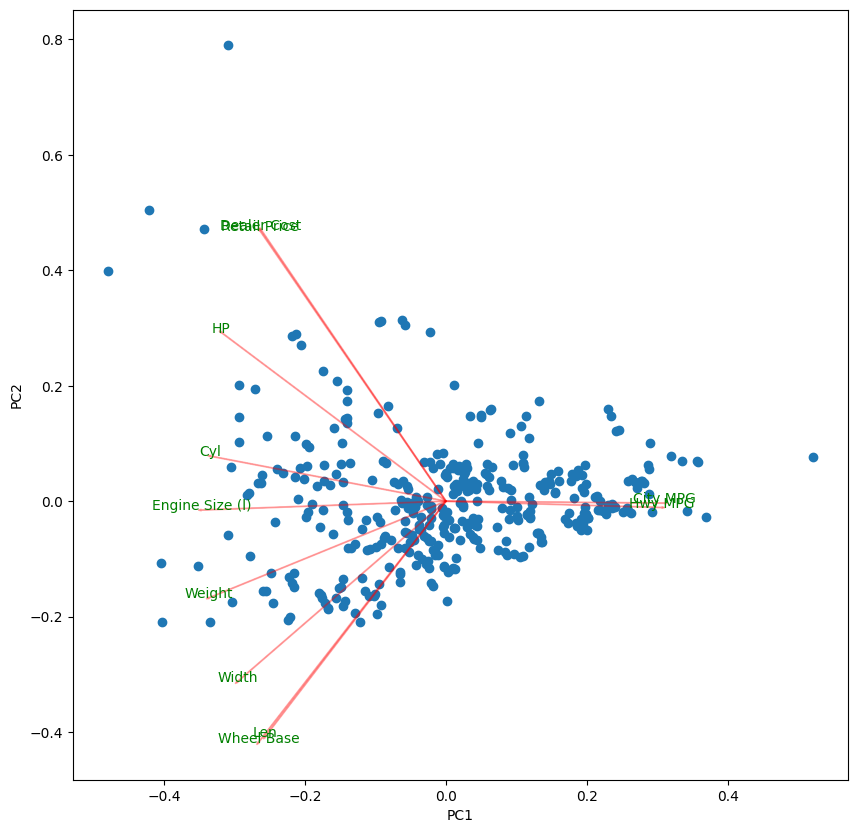

In [16]:
pc_plot(cars_decomposed, cars_pca.components_.T, labels=cars_attributes)

Taka wizualizacja pokazuje korelację między poszczególnymi atrybutami - tym mniejszy kąt, tym większa korelacja. Widać na przykład, że rozmiar silnika jest powiązny z liczbą cylindrów, ta z mocą silnika, a moc silnika z ceną. Widać też, że wielkość silnika jest ujemnie skorelowana ze spalaniem - tym większy silnik, tym większe spalanie (mniejsza liczba mil na jednym galonie) - kąt jest bardzo wypukły.